In [2]:
import re


def recognize_error(error_message: str, file_content: str) -> bool:
    """
    Recognize if the error message and file content match the specified patterns.

    Args:
    error_message (str): The error message to check.
    file_content (str): The file content to check.

    Returns:
    bool: True if the error message and file content match the patterns, False otherwise.
    """

    # Error Message Pattern
    error_pattern = r"^The circuits are not equivalent:.*"

    # File Content Pattern
    file_pattern = r"^qc\.[a-z]+\(.*\)"

    # Check Error Message Pattern
    error_match = re.search(error_pattern, error_message, re.MULTILINE)

    # Check File Content Pattern
    file_lines = file_content.splitlines()
    file_matches = [re.search(file_pattern, line) for line in file_lines]

    # Return True if both patterns match
    return error_match is not None and any(file_matches)

In [3]:
msg = """The circuits are not equivalent: /workspace/qiskit_circuit_32q_10g_3090_49e0ac_qc_pennylane.qasm, /workspace/qiskit_circuit_32q_10g_3090_49e0ac_qc_pytket.qasm"""

content = """qc.z(qr[2])
qc.mcrx(0.739248, [qr[1]], qr[7])
qc.mcrz(5.812074, [qr[29]], qr[11])
qc.mcrz(5.415601, [qr[2], qr[7]], qr[28])
qc.cu(3.456618, 3.738611, 0.92828, 4.482527, qr[28], qr[12])
qc.tdg(qr[9])
qc.cx(qr[11], qr[28])
qc.csdg(qr[29], qr[13])
qc.t(qr[16])
qc.ccz(qr[3], qr[28], qr[14])"""

print(recognize_error(msg, content))

True


In [5]:
import re


def recognize_error(error_message: str, file_content: str) -> bool:
    """
    Recognize if the error message and file content match the pattern.

    Args:
    error_message (str): The error message.
    file_content (str): The file content (not used in this case).

    Returns:
    bool: True if the error message matches the pattern, False otherwise.
    """
    pattern = r"Cannot print command of type: PhasedX\(\d+\.\d+,\s*\d\)"
    match = re.search(pattern, error_message)
    return match is not None


msg = "Cannot print command of type: PhasedX(0.5, 0)"

content = """qc.cx(qr[30], qr[29])
qc.cswap(qr[10], qr[9], qr[4])
qc.y(qr[18])
qc.iswap(qr[14], qr[16])
qc.iswap(qr[21], qr[16])
qc.ecr(qr[12], qr[16])
qc.cz(qr[25], qr[23])
qc.sxdg(qr[17])
qc.ryy(0.35179, qr[23], qr[19])
qc.tdg(qr[29])"""

print(recognize_error(msg, content))

True


# Error 1: Multiline not correctly supported

In [11]:
import re


def recognize_error(error_message: str, file_content: str) -> bool:
    """
    Recognizes the error pattern in the given error message and file content.

    Args:
    error_message (str): The error message to match.
    file_content (str): The file content to match (not used in this implementation).

    Returns:
    bool: True if the error pattern is matched, False otherwise.
    """
    # Define the regex pattern for the error message
    error_pattern = r"^Could not import second circuit: .*:\d+:\d+: Expected .*"

    # Use re.MULTILINE flag to allow the regex pattern to match multiline strings
    return bool(re.match(error_pattern, error_message, re.MULTILINE))


msg = """Could not import second circuit: <input>:3:6:
Expected 'Identifier', got 'ms'. """
content = """qc.mcx([qr[10], qr[22]], qr[23])
qc.ms(6.090406, [qr[26], qr[27]])
qc.t(qr[24])
qc.ecr(qr[1], qr[12])
qc.rxx(4.959506, qr[22], qr[5])
qc.mcry(1.662336, [qr[17], qr[15]], qr[20])
qc.swap(qr[9], qr[25])
qc.s(qr[13])
qc.mcrx(5.278086, [qr[15], qr[4], qr[1]], qr[19])
qc.csdg(qr[17], qr[9])"""

print(recognize_error(msg, content))

False


In [15]:
# CORRECT
error_pattern = r"^Could not import second circuit: .*:\d+:\d+:\nExpected .*"
bool(re.match(error_pattern, msg, re.MULTILINE))

True

# Examples Pos/neg

In [17]:
# 003_001_Cluster_Error_Messages_Auto_Label_2024_10_28_13_55_auto_label_examples_embedding_5_positive_2_negative
# cluster 2
import re


def recognize_error(error_message: str, file_content: str) -> bool:
    """
    Recognizes if the given error message and file content matches the pattern of a quantum circuit implementation error.

    Args:
        error_message (str): The error message to check.
        file_content (str): The content of the file to check.

    Returns:
        bool: True if the error message and file content matches the pattern, False otherwise.
    """

    # Check for the specific error message
    error_pattern = r"Gate has an invalid number of parameters"
    error_match = re.search(error_pattern, error_message)

    # Check for a generic quantum circuit implementation pattern in the file content
    # Matches "qc." followed by one or more lowercase letters (gate operations)
    qc_pattern = r"qc\.[a-z]+"
    qc_match = re.search(qc_pattern, file_content, re.MULTILINE)

    # Return True if both patterns are found
    return error_match is not None and qc_match is not None

In [ ]:
# 003_001_Cluster_Error_Messages_Auto_Label_2024_10_28_13_52_auto_label_examples_embedding_5_positive_5_negative
# cluster 2

def recognize_error(error_message: str, file_content: str) -> bool:
    """
    Recognize the error pattern based on the error message and file content.

    Args:
        error_message (str): The error message to check.
        file_content (str): The file content to check.

    Returns:
        bool: True if the error pattern is matched, False otherwise.
    """
    # Compile the error message pattern
    error_message_pattern = re.compile(
        r"Gate has an invalid number of parameters", re.IGNORECASE)

    # Compile the file content pattern (look for any QC command)
    file_content_pattern = re.compile(
        r"qc\.\w+\(.*?\)", re.IGNORECASE | re.MULTILINE)

    # Check if the error message pattern is matched
    error_message_match = error_message_pattern.search(error_message)

    # Check if the file content pattern is matched
    file_content_match = file_content_pattern.search(file_content)

    # Return True if both patterns are matched, False otherwise
    return error_message_match is not None and file_content_match is not None

QASM output:
OPENQASM 2.0;
include "qelib1.inc";
qreg q[4];
creg c[4];
h q[0];
cx q[0],q[1];
z q[1];
x q[2];
y q[3];
cz q[0],q[2];
swap q[1],q[3];
measure q[0] -> c[0];
measure q[1] -> c[1];
measure q[2] -> c[2];
measure q[3] -> c[3];

Quantum Circuit:


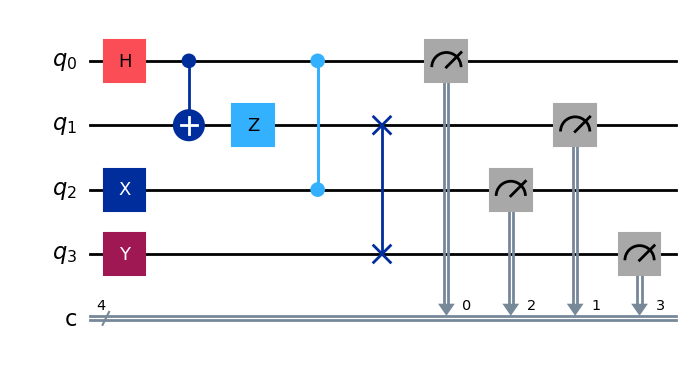

In [6]:
from qiskit import QuantumCircuit
from qiskit import qasm2

# Create a quantum circuit with 4 qubits and a classical register
qc = QuantumCircuit(4, 4)
qc.h(0)  # Apply Hadamard gate to qubit 0
qc.cx(0, 1)  # Apply CNOT gate with control qubit 0 and target qubit 1
qc.z(1)  # Apply Z gate to qubit 1
qc.x(2)  # Apply X gate to qubit 2
qc.y(3)  # Apply Y gate to qubit 3
qc.cz(0, 2)  # Apply CZ gate with control qubit 0 and target qubit 2
qc.swap(1, 3)  # Apply SWAP gate between qubit 1 and qubit 3
qc.measure([0, 1, 2, 3], [0, 1, 2, 3])  # Measure all qubits

# Export the circuit to QASM
qasm_str = qasm2.dumps(qc)

# Print the QASM
print("QASM output:")
print(qasm_str)

# Print the circuit
print("\nQuantum Circuit:")
qc.draw(output='mpl')